# Capstone Breakdown Group 1A

**Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.**

## EDA process

Our project is divided in the following two umbrella categories:

PROFIT:

- Budget v Revenue
- Genre vs. Revenue 
- Popularity v Revenue
- Foreign/Domestic Results vs. Revenue  

POPULARITY: X

- Director vs. Popularity/Voter Avg. x
- Genre vs. Popularity/Voter Avg. 
- Domestic/International vs. Popularity/Voter Avg.  

## Specific insight

We want to gain insights from our data on the following specific points. We are performing EDA to be able to answer questions regarding:

- Revenue compared to rating of the film (critics and audience) x
- I.P and foreign/domestic revenue x
- Original language to revenue 
- Market: domestic/ global
- Writers and directors to revenue

In [1]:
# Import packages SAVEEE UPDATE

import numpy as np
import pandas as pd
import sqlite3

In [2]:
# Read data sets

rtDF = pd.read_csv("Data/rt.movie_info.tsv", sep="\t") #Rotten Tomatoes Movies
rtDF_reviews = pd.read_csv("Data/rt.reviews.tsv", sep="\t", encoding = "latin_1") #Rotten Tomatoes Reviews
bomDF = pd.read_csv("Data/bom.movie_gross.csv") #Box Office Mojo Database
tmdbDF = pd.read_csv("Data/tmdb.movies.csv",index_col=0) #The MovieDB
tnmDF = pd.read_csv("Data/tn.movie_budgets.csv") #The Numbers

conn = sqlite3.connect('Data/im.db')

In [3]:
#Visualize rotten tomatoes reviews
print(rtDF_reviews.info())
rtDF_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
#Visualize rotten tomatoes reviews
print(bomDF.info())
bomDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#Visualize box office mojo database
print(tmdbDF.info())
tmdbDF.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
None


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
#Visualize box office mojo database
print(rtDF.info())
rtDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
#Visualize the numbers
print(tnmDF.info())
tnmDF.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# 
rtDF.drop(columns=['currency','box_office','studio','synopsis','dvd_date'],inplace=True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
%matplotlib inline

In [11]:
tmdbDF=tmdbDF.rename(columns={'original_title': 'movie'})

In [12]:
df1 = pd.merge(tmdbDF, tnmDF, on='movie', how='outer')

In [13]:
df1 = df1[df1['production_budget'].notna()]
df1 = df1[df1['domestic_gross'].notna()]

In [14]:
df1['production_budget']=df1['production_budget'].apply(lambda x: x.replace('$', ''))
df1['production_budget'] = df1['production_budget'].replace([','],'', regex=True)
df1['production_budget'] = pd.to_numeric(df1['production_budget'])

In [15]:
df1['domestic_gross']=df1['domestic_gross'].apply(lambda x: x.replace('$', ''))
df1['domestic_gross'] = df1['domestic_gross'].replace([','],'', regex=True)
df1['domestic_gross'] = pd.to_numeric(df1['domestic_gross'])

In [16]:
df1['worldwide_gross']=df1['worldwide_gross'].apply(lambda x: x.replace('$', ''))
df1['worldwide_gross'] = df1['worldwide_gross'].replace([','],'', regex=True)
df1['worldwide_gross'] = pd.to_numeric(df1['worldwide_gross'])

In [17]:
df1

,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
1,"[14, 12, 16, 10751]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,30.0,"Mar 26, 2010",165000000,217581232,494870992
2,"[12, 28, 878]",10138.0,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0,15.0,"May 7, 2010",170000000,312433331,621156389
3,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,37.0,"Nov 22, 1995",30000000,191796233,364545516
4,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,37.0,"Nov 22, 1995",30000000,191796233,364545516
5,"[28, 878, 12]",27205.0,en,Inception,27.920,2010-07-16,Inception,8.3,22186.0,38.0,"Jul 16, 2010",160000000,292576195,835524642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30415,NaN,NaN,NaN,Red 11,NaN,NaN,NaN,NaN,NaN,78.0,"Dec 31, 2018",7000,0,0
30416,NaN,NaN,NaN,Following,NaN,NaN,NaN,NaN,NaN,79.0,"Apr 2, 1999",6000,48482,240495
30417,NaN,NaN,NaN,Return to the Land of Wonders,NaN,NaN,NaN,NaN,NaN,80.0,"Jul 13, 2005",5000,1338,1338
30418,NaN,NaN,NaN,A Plague So Pleasant,NaN,NaN,NaN,NaN,NaN,81.0,"Sep 29, 2015",1400,0,0


In [18]:
# Scatter Plot with budget vs gross
#plt.scatter(x=tnmDF['production_budget'], y=tnmDF['domestic_gross'])
#plt.title('Production Budget vs. Domestic Gross Earnings')
#plt.xlabel('Domestic Gross Earnings')
#plt.ylabel('Production Budget')

In [19]:
df1["production_budget"].describe()

count    6.139000e+03
mean     3.184947e+07
std      4.231689e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

<ipython-input-72-e224af59b87a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_xticklabels(xlabels)
<ipython-input-72-e224af59b87a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 100000000.0, '100M'),
 Text(0, 200000000.0, '200M'),
 Text(0, 300000000.0, '300M'),
 Text(0, 400000000.0, '400M'),
 Text(0, 500000000.0, '500M')]

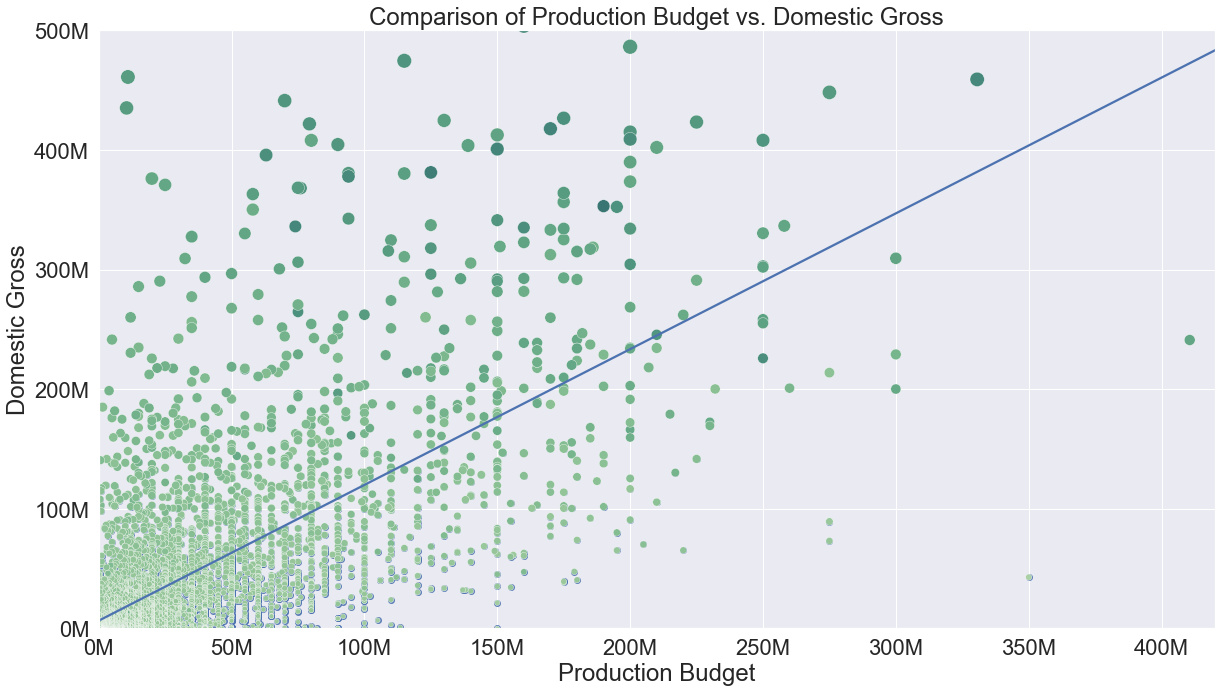

In [72]:
#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
sns.regplot(x="production_budget", y="domestic_gross", ci=None, data=df1)
#data frame with adjust x/y with aesthetics
gfg=sns.scatterplot(data=df1, x="production_budget", y="domestic_gross", 
                size="domestic_gross", sizes=(20, 400), hue="Profit", palette="ch:r=-.5,l=.75", legend=False)
#expanding x-axis
plt.xlim([0,420000000])
#extending y-axis for outlier
plt.ylim(([0,500000000]))
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
gfg.set(xlabel ="Production Budget", ylabel = "Domestic Gross", 
        title ='Comparison of Production Budget vs. Domestic Gross')
#creating list of formated x-ticks
xlabels = ['{:,.0f}'.format(x) + 'M' for x in gfg.get_xticks()/1000000]
#replacing x-ticks
gfg.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) + 'M' for x in gfg.get_yticks()/1000000]
#replacing y-ticks
gfg.set_yticklabels(ylabels)


<ipython-input-84-14b7380c3b88>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_xticklabels(xlabels)
<ipython-input-84-14b7380c3b88>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 200000000.0, '200M'),
 Text(0, 400000000.0, '400M'),
 Text(0, 600000000.0, '600M'),
 Text(0, 800000000.0, '800M'),
 Text(0, 1000000000.0, '1,000M'),
 Text(0, 1200000000.0, '1,200M'),
 Text(0, 1400000000.0, '1,400M'),
 Text(0, 1600000000.0, '1,600M'),
 Text(0, 1800000000.0, '1,800M')]

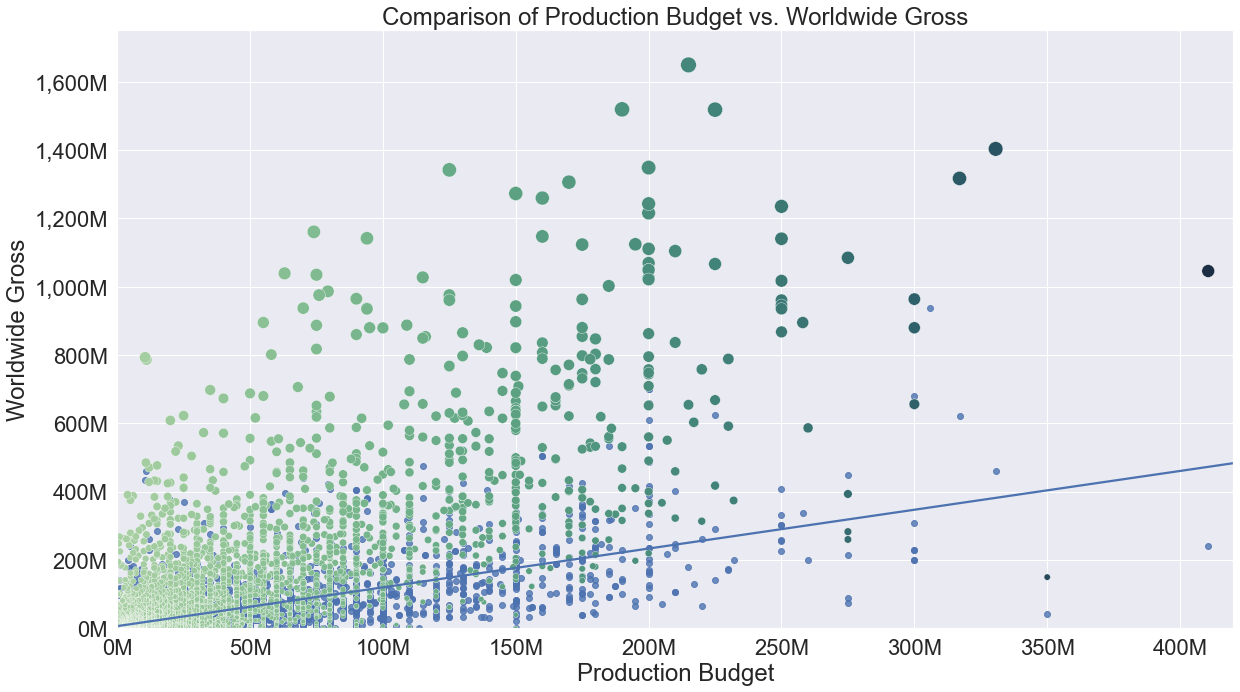

In [84]:
#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
sns.regplot(x="production_budget", y="domestic_gross", ci=None, data=df1)
#data frame with adjust x/y with aesthetics
gfg=sns.scatterplot(data=df1, x="production_budget", y="worldwide_gross", 
                size="worldwide_gross", sizes=(20, 400), hue="production_budget", palette="ch:r=-.5,l=.75", legend=False)
#expanding x-axis
plt.xlim([0,420000000])
#extending y-axis for outlier
plt.ylim(([0,1750000000]))
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
gfg.set(xlabel ="Production Budget", ylabel = "Worldwide Gross", 
        title ='Comparison of Production Budget vs. Worldwide Gross')
#creating list of formated x-ticks
xlabels = ['{:,.0f}'.format(x) + 'M' for x in gfg.get_xticks()/1000000]
#replacing x-ticks
gfg.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) + 'M' for x in gfg.get_yticks()/1000000]
#replacing y-ticks
gfg.set_yticklabels(ylabels)

In [22]:
#subtracting production budget from worldwide gross to get overall profit of each movie
#assuming worldwide gross is total revenue
df1["Profit"] = df1["worldwide_gross"] - df1["production_budget"]

In [37]:
df1["Profit"].describe()

count    6.139000e+03
mean     6.155481e+07
std      1.488437e+08
min     -2.002376e+08
25%     -2.185710e+06
50%      8.815460e+06
75%      6.200615e+07
max      2.351345e+09
Name: Profit, dtype: float64

In [38]:
df1["production_budget"].describe()

count    6.139000e+03
mean     3.184947e+07
std      4.231689e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [23]:
df1.head()

,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,Profit
1,"[14, 12, 16, 10751]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,30.0,"Mar 26, 2010",165000000,217581232,494870992,329870992
2,"[12, 28, 878]",10138.0,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0,15.0,"May 7, 2010",170000000,312433331,621156389,451156389
3,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,37.0,"Nov 22, 1995",30000000,191796233,364545516,334545516
4,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,37.0,"Nov 22, 1995",30000000,191796233,364545516,334545516
5,"[28, 878, 12]",27205.0,en,Inception,27.920,2010-07-16,Inception,8.3,22186.0,38.0,"Jul 16, 2010",160000000,292576195,835524642,675524642


<ipython-input-67-7a45adf7fd36>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_xticklabels(xlabels)
<ipython-input-67-7a45adf7fd36>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 50000000.0, '50M'),
 Text(0, 100000000.0, '100M'),
 Text(0, 150000000.0, '150M'),
 Text(0, 200000000.0, '200M'),
 Text(0, 250000000.0, '250M'),
 Text(0, 300000000.0, '300M'),
 Text(0, 350000000.0, '350M')]

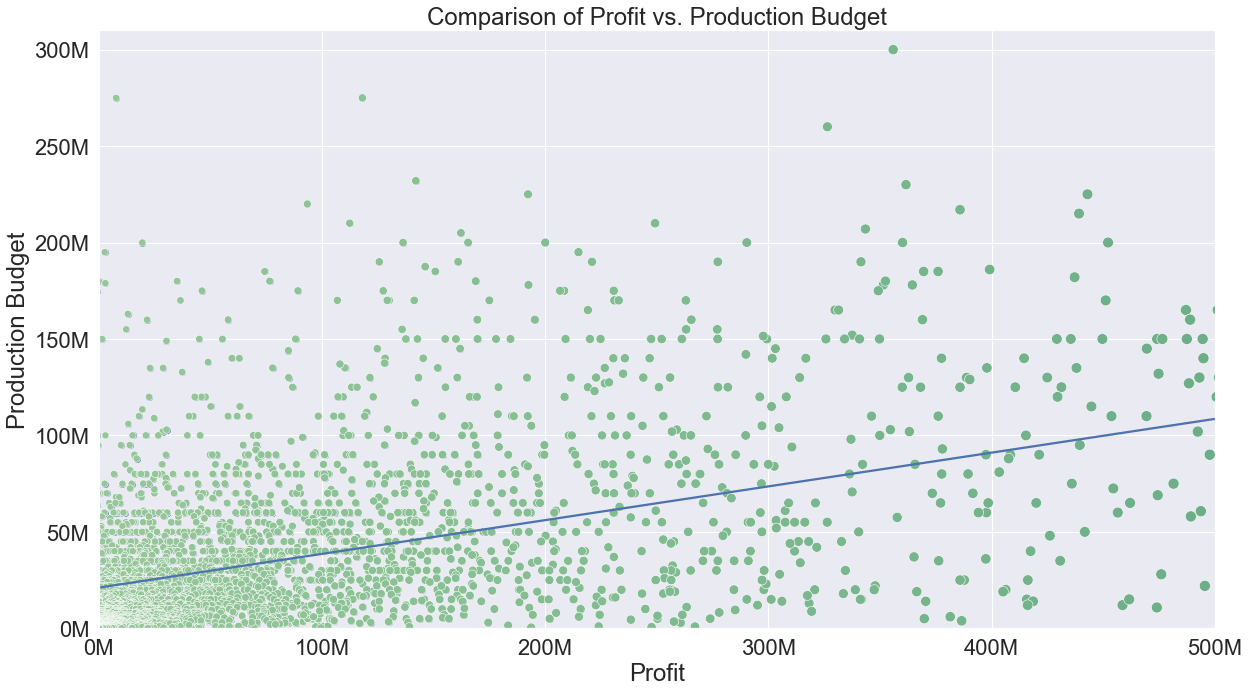

In [67]:
#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
sns.regplot(x="Profit", y="production_budget", ci=None, data=df1)
#data frame with adjust x/y with aesthetics
gfg=sns.scatterplot(data=df1, x="Profit", y="production_budget", 
                size="Profit", sizes=(20, 400), hue="Profit", palette="ch:r=-.5,l=.75", legend=False)
#expanding x-axis
plt.xlim([0,500000000])
#extending y-axis for outlier
plt.ylim(([0,310000000]))
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
gfg.set(xlabel ="Profit", ylabel = "Production Budget", 
        title ='Comparison of Profit vs. Production Budget')
#creating list of formated x-ticks
xlabels = ['{:,.0f}'.format(x) + 'M' for x in gfg.get_xticks()/1000000]
#replacing x-ticks
gfg.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) + 'M' for x in gfg.get_yticks()/1000000]
#replacing y-ticks
gfg.set_yticklabels(ylabels)

<ipython-input-125-04c2c9361d27>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_xticklabels(xlabels)
<ipython-input-125-04c2c9361d27>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_yticklabels(ylabels)


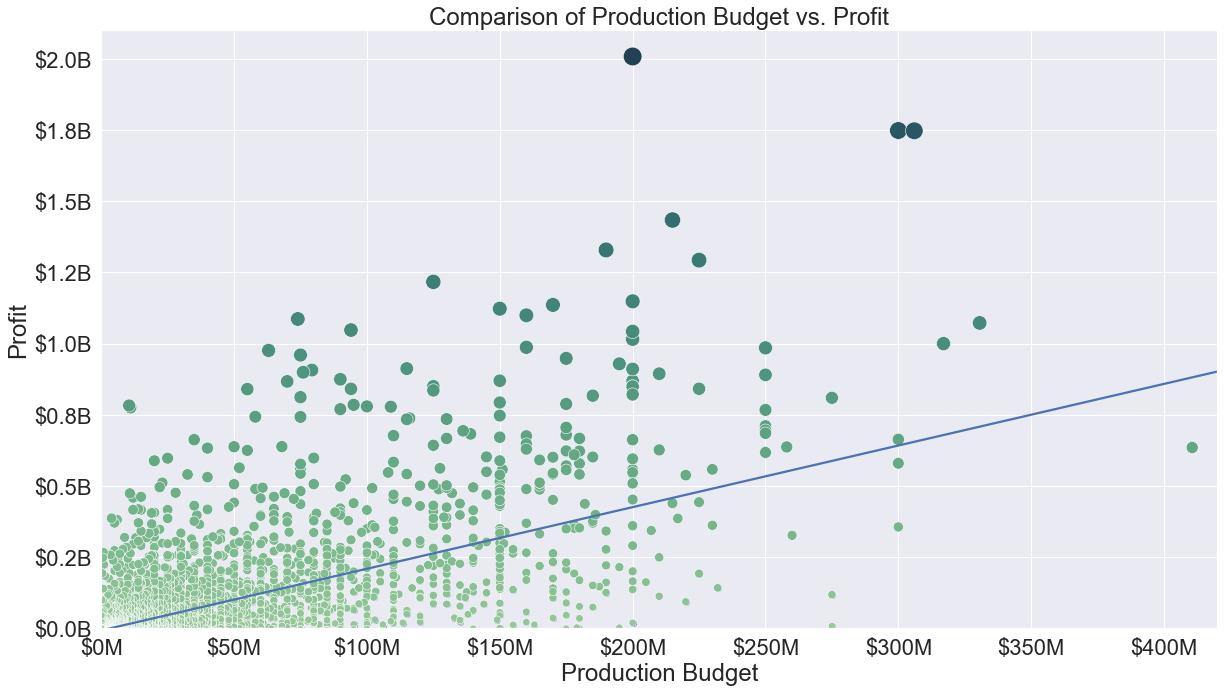

In [125]:
#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
sns.regplot(x="production_budget", y="Profit", ci=None, data=df1)
#data frame with adjust x/y with aesthetics
gfg=sns.scatterplot(data=df1, x="production_budget", y="Profit", 
                size="Profit", sizes=(20, 400), hue="Profit", palette="ch:r=-.5,l=.75", legend=False)
#expanding x-axis
plt.xlim([0,420000000])
#extending y-axis for outlier
plt.ylim(([0,2100000000]))
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
gfg.set(xlabel ="Production Budget", ylabel = "Profit", 
        title ='Comparison of Production Budget vs. Profit')
#creating list of formated x-ticks
xlabels = ['${:,.0f}'.format(x) + 'M' for x in gfg.get_xticks()/1000000]
#replacing x-ticks
gfg.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['${:,.1f}'.format(x) + 'B' for x in gfg.get_yticks()/1000000000]
#replacing y-ticks
gfg.set_yticklabels(ylabels)
plt.show()

In [50]:
print(df1['production_budget'].corr(df1['Profit']))

0.6153208818943078


In [52]:
print(df1['production_budget'].corr(df1['worldwide_gross']))

0.7521187940886972


In [51]:
print(df1['production_budget'].corr(df1['domestic_gross']))

0.6877100946101572


In [24]:
rtDF_reviews.info()
rtDF_reviews.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [25]:
print(sum(rtDF_reviews['rating'].isna()))
# Dropping top_critic, publisher, and date columns because the information provided is not relevant to the scope of this study
rtDF_reviews.drop(columns=["top_critic","publisher","date"],inplace=True)

13517


In [26]:
rtDF_reviews['rating'].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [27]:
print(bomDF.info())
bomDF.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [28]:
# Dropped rows where domestic gross was NaN
bomDF = bomDF[bomDF['domestic_gross'].notna()]
# 
bomDF['foreign_gross'] = bomDF['foreign_gross'].replace(',','', regex=True)
bomDF["foreign_gross"] = pd.to_numeric(bomDF["foreign_gross"])
bomDF.drop(columns=['studio'],inplace=True)
bomDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2009 non-null   float64
 3   year            3359 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 131.2+ KB


In [29]:
bomDF['year'] = bomDF['year'].astype(str).str.split(', ').str[-1].str[:4]
#.str[-1] is meant taken the string after ', 

In [30]:
bomDF['budget'] = movies['budget']/1000000 movies['gross'] = movies['gross']/1000000

SyntaxError: invalid syntax (<ipython-input-30-2c796763459c>, line 1)

In [ ]:
print(tmdbDF.info())
tmdbDF.head(5)

In [ ]:
GenreDict = {28:"Action", 12:"Adventure", 16:"Animation", 35:"Comedy", 80:"Crime",
             99:"Documentary",18:"Drama",10751:"Family",14:"Fantasy",36:"History",
             27:"Horror",10402:"Music",9648:"Mystery",10749:"Romance",
             878:"Science Fiction", 10770:"TV Movie",53:"Thriller",10752:"War",37:"Western"}

In [ ]:
print(tnmDF.info())
tnmDF.head()


## To-do
- Plug-in genre to the movies tables
- Split genres in rtDF
- Fill in nulls in foreign gross
- movie & genre IDs match up (explore relationships between dataframes)